In [162]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2 as cv
import torch
import torch
import numpy as np
from PIL import Image, ImageDraw

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [3]:
torch.cuda.set_device(0)

## training

In [4]:
model = YOLO('yolov8n-seg.pt')

In [5]:
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

train_res = model.train(
    data="data/roboflow/data.yaml",
    epochs=20,
    batch=-1,  
    imgsz=640,
    device="gpu",
)

Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3050 Laptop GPU, 3795MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data/roboflow/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/train/labels... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 2551.68it/s]

train: New cache created: /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:g (NVIDIA GeForce RTX 3050 Laptop GPU) 3.71G total, 0.11G reserved, 0.08G allocated, 3.51G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3263811           0         0.461         204.8           nan        (1, 3, 640, 640)                    list
     3263811           0         0.900         97.26           nan        (2, 3, 640, 640)                    list
     3263811           0         1.600         81.83           nan        (4, 3, 640, 640)                    list
     3263811           0         3.068         148.4           nan        (8, 3, 640, 640)                    list
     3263811           0         5.830         89.31           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 5 for CUDA:g 2.19G/3.71G (59%) ✅


train: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/train/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]
val: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<00:00, 759.11it/s]

val: New cache created: /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005078125), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.937G     0.8232      2.167      1.725       1.34         14        640: 100%|██████████| 72/72 [00:08<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         31         31      0.887      0.839      0.891      0.607      0.852      0.806      0.831      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.946G     0.7928      1.156      1.201      1.261         14        640: 100%|██████████| 72/72 [00:07<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.20it/s]

                   all         31         31      0.908      0.958      0.984      0.816      0.908      0.958      0.984      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.954G     0.7721       1.11      1.115      1.244         10        640: 100%|██████████| 72/72 [00:07<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.92it/s]

                   all         31         31      0.878       0.71      0.829      0.679      0.878       0.71      0.819      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.952G     0.7634      1.049     0.9906      1.241         13        640: 100%|██████████| 72/72 [00:07<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]

                   all         31         31      0.676      0.677      0.749      0.574      0.676      0.677      0.749      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.956G     0.7549      1.071     0.9262       1.23         15        640: 100%|██████████| 72/72 [00:07<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.21it/s]

                   all         31         31      0.776      0.548       0.55      0.425      0.776      0.548      0.552      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.958G     0.6819          1     0.8057      1.184         16        640: 100%|██████████| 72/72 [00:07<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]

                   all         31         31      0.896      0.935      0.946      0.819      0.896      0.935      0.946      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.952G     0.6549     0.9771     0.7661      1.155          9        640: 100%|██████████| 72/72 [00:07<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]

                   all         31         31      0.967      0.958      0.981      0.801      0.967      0.958      0.981      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.954G     0.6556     0.8964     0.7227      1.169         17        640: 100%|██████████| 72/72 [00:07<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.69it/s]

                   all         31         31      0.866      0.935      0.964      0.759      0.866      0.935      0.964      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.956G     0.6059     0.8853     0.6803      1.131         17        640: 100%|██████████| 72/72 [00:07<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.29it/s]

                   all         31         31      0.965          1      0.994      0.868      0.965          1      0.994      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.935G     0.5904     0.9054     0.6267      1.126         18        640: 100%|██████████| 72/72 [00:07<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.09it/s]

                   all         31         31          1       0.93       0.95      0.819          1       0.93       0.95      0.869


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      0.94G      0.559      0.852     0.9335      1.206          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]

                   all         31         31      0.997          1      0.995      0.822      0.997          1      0.995      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      0.94G     0.5261     0.7914     0.7353      1.186          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.44it/s]

                   all         31         31      0.911      0.987      0.987      0.823      0.911      0.987      0.987      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.944G      0.482     0.7086     0.6455      1.125          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.41it/s]

                   all         31         31      0.961          1      0.993      0.905      0.961          1      0.993      0.896



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.944G     0.4632     0.6977      0.596      1.114          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.71it/s]

                   all         31         31      0.936          1      0.992      0.893      0.936          1      0.992      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.946G     0.4506     0.6486     0.5596      1.099          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]

                   all         31         31      0.939      0.999      0.991      0.859      0.939      0.999      0.991      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.944G     0.4534     0.6451     0.5288      1.091          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.26it/s]

                   all         31         31      0.966          1      0.994      0.894      0.966          1      0.994      0.915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.944G     0.4055     0.6063     0.4895      1.057          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]

                   all         31         31          1      0.966      0.991      0.873          1      0.966      0.991      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.944G     0.3787     0.5846     0.4494      1.031          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]

                   all         31         31      0.968      0.964      0.992      0.889      0.968      0.964      0.992      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.944G     0.3562      0.558     0.4296      1.009          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.96it/s]

                   all         31         31          1      0.963      0.993      0.907          1      0.963      0.993      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.944G     0.3427     0.5492     0.4078     0.9973          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]

                   all         31         31          1      0.967      0.979      0.905          1      0.967      0.994      0.893



20 epochs completed in 0.045 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.7MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.7MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3050 Laptop GPU, 3795MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]


                   all         31         31      0.966          1      0.994      0.894      0.966          1      0.994      0.915
Speed: 0.5ms preprocess, 5.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/train


# evaluation and inference

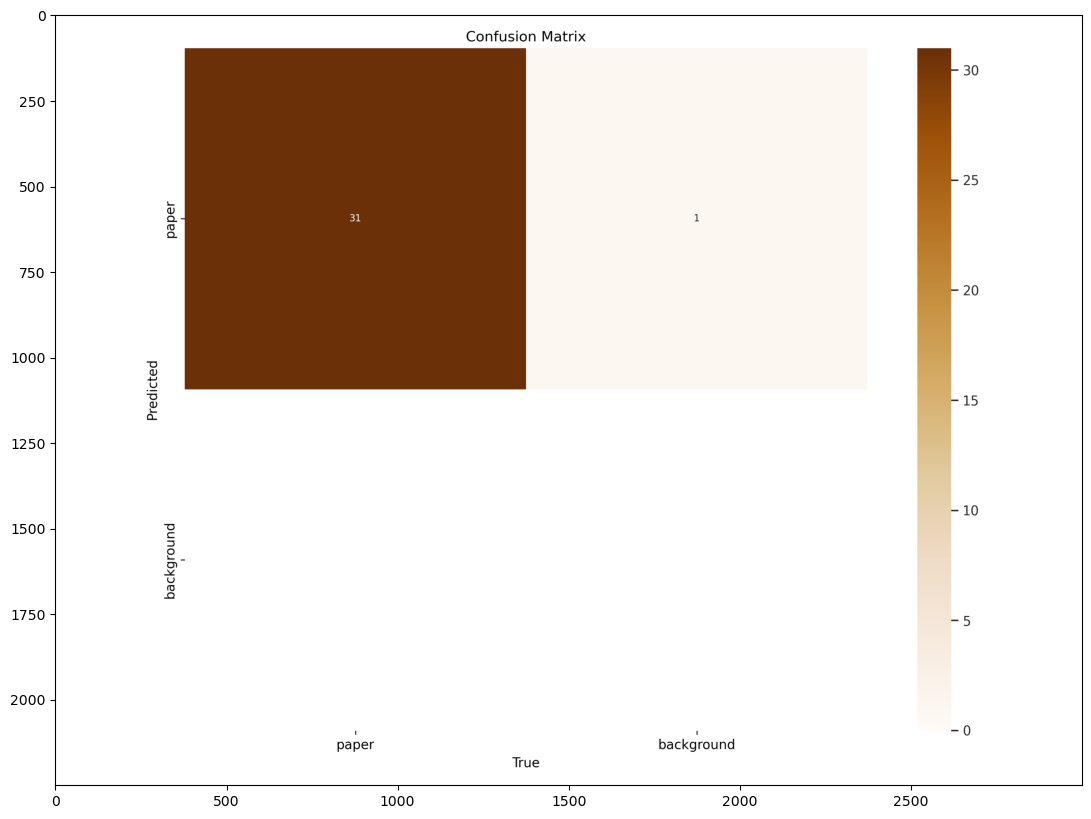

In [17]:
confusion_matrix = cv.imread("runs/segment/train/confusion_matrix.png")
fig = plt.figure(figsize=(15, 10))
plt.imshow(confusion_matrix)
plt.show()

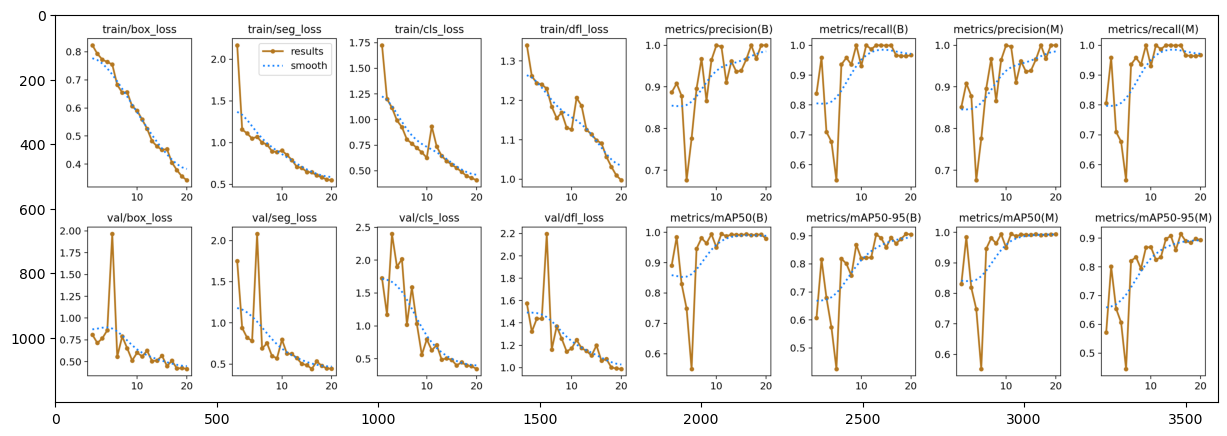

In [18]:
metrics = cv.imread("runs/segment/train/results.png")
fig = plt.figure(figsize=(15, 10))
plt.imshow(metrics)
plt.show()

In [19]:
model_best=YOLO('runs/segment/train/weights/best.pt')

In [20]:
val = model_best.val()

Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3795MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients


val: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


                   all         31         31      0.966          1      0.994      0.896      0.966          1      0.994      0.916
Speed: 0.3ms preprocess, 38.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val


# inference

In [48]:
results = model_best("data/roboflow/test/images/")
for im in results:
  im.show()


image 1/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0002_jpg.rf.598a25ee946dd19d5248fbea11058477.jpg: 640x480 1 paper, 9.7ms
image 2/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0080_jpeg.rf.59bdd09980d768ed4e99a8294cee13c0.jpg: 384x640 1 paper, 9.0ms
image 3/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0104_jpeg.rf.bbf60fa0c46f432a3b1ae7e7fb473b1e.jpg: 384x640 1 paper, 5.1ms
image 4/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0117_jpeg.rf.24585b7613fd85ac37e462a0c1cc9008.jpg: 384x640 1 paper, 5.7ms
image 5/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segment

Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'


[GFX1-]: glxtest: Could not connect to wayland display, WAYLAND_DISPLAY=(null)
[GFX1-]: More than 1 GPU vendor detected via PCI, cannot deduce vendor

[GFX1-]: PCI candidate 0x8086/0x9a68

[GFX1-]: PCI candidate 0x10de/0x25a2



Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
[ERROR glean_core::metrics::ping] Invalid reason code active for ping usage-reporting
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fa

Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'


In [ ]:
path = model_best.export(format="tflite",int8=True,imgsz=640)

In [36]:
model_quant=YOLO('runs/segment/train/weights/best.pt')
model_quant.to('cuda')

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_runnin

In [41]:
res=model_quant.predict("data/roboflow/test/images/", imgsz=640,device='gpu')


image 1/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0002_jpg.rf.598a25ee946dd19d5248fbea11058477.jpg: 640x480 1 paper, 9.4ms
image 2/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0080_jpeg.rf.59bdd09980d768ed4e99a8294cee13c0.jpg: 384x640 1 paper, 8.5ms
image 3/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0104_jpeg.rf.bbf60fa0c46f432a3b1ae7e7fb473b1e.jpg: 384x640 1 paper, 7.1ms
image 4/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0117_jpeg.rf.24585b7613fd85ac37e462a0c1cc9008.jpg: 384x640 1 paper, 5.6ms
image 5/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segment

In [145]:
res[0]?

Type:           Results
String form:   
ultralytics.engine.results.Results object with attributes:
           
           boxes: ultralytics.engine.results.Box <...> preprocess': 16.90983772277832, 'inference': 9.373903274536133, 'postprocess': 4.973411560058594}
Length:         1
File:           ~/.conda/envs/pytorch/lib/python3.12/site-packages/ultralytics/engine/results.py
Docstring:     
A class for storing and manipulating inference results.

This class encapsulates the functionality for handling detection, segmentation, pose estimation,
and classification results from YOLO models.

Attributes:
    orig_img (numpy.ndarray): Original image as a numpy array.
    orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
    boxes (Boxes | None): Object containing detection bounding boxes.
    masks (Masks | None): Object containing detection masks.
    probs (Probs | None): Object containing class probabilities for classification tasks.
    keypoints (Keypoints | 

In [153]:
res[0].save()

Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'


[GFX1-]: glxtest: Could not connect to wayland display, WAYLAND_DISPLAY=(null)
[GFX1-]: More than 1 GPU vendor detected via PCI, cannot deduce vendor

[GFX1-]: PCI candidate 0x8086/0x9a68

[GFX1-]: PCI candidate 0x10de/0x25a2



[ERROR glean_core::metrics::ping] Invalid reason code active for ping usage-reporting


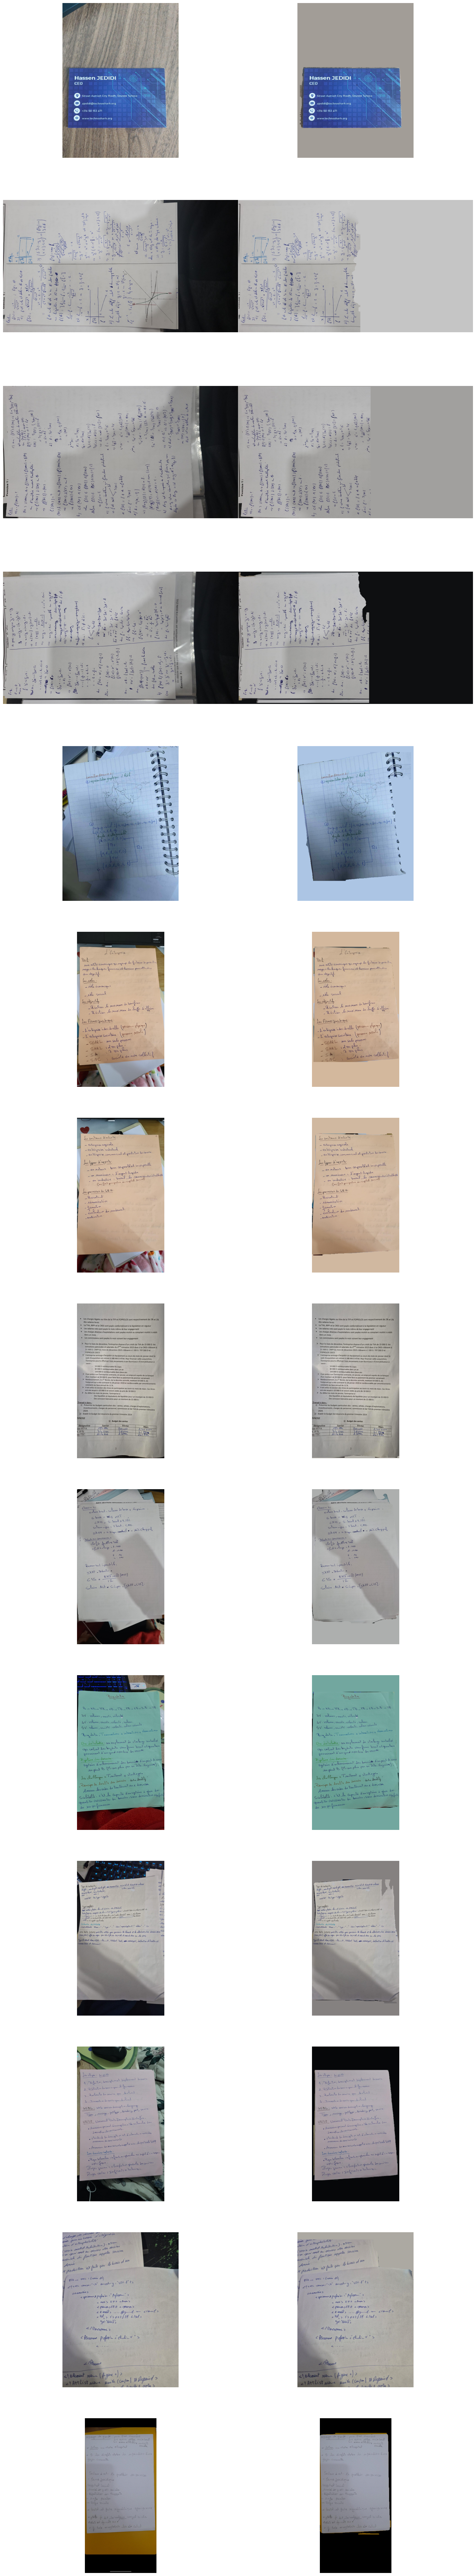

In [178]:
index=1
plt.figure(figsize=(20,110))
plt.subplots_adjust(wspace=0)
for r in res:
    img = np.copy(r.orig_img)
    for ci, c in enumerate(r):
        label = c.names[c.boxes.cls.tolist().pop()]
        
        
        
        
    b_mask = np.zeros(img.shape[:2], np.uint8)

    contour = c.masks.xy.pop()

    contour = contour.astype(np.int32)

    contour = contour.reshape(-1, 1, 2)

    cv.drawContours(b_mask, [contour], -1, (255, 255, 255), cv.FILLED)




    isolated = np.dstack([img, b_mask])




    x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)



#    iso_crop = isolated[y1:y2, x1:x2]


    colors, count = np.unique(img.reshape(-1,img.shape[-1]), axis=0, return_counts=True)
    bg_color= colors[count.argmax()]

    # Create 3-channel mask
    mask3ch = cv.cvtColor(b_mask, cv.COLOR_GRAY2BGR)

    isolated = cv.bitwise_and(mask3ch, img)    

    inverse_mask = cv.bitwise_not(mask3ch)

    result_img = np.full_like(img, bg_color, dtype=np.uint8)

    result_img[inverse_mask == 0] = img[inverse_mask == 0]

    plt.axis('off')

    plt.subplot(14, 2, index)
    plt.imshow(cv.cvtColor(r.orig_img, cv.COLOR_BGR2RGB))

    plt.axis('off')

    plt.subplot(14, 2, index+1)
    plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))


    index+=2
    plt.axis('off')
